# Appendix

In [1]:
import pickle
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

with open("data/edits.pkl", "rb") as file:
    edits = pickle.load(file)
    
with open("data/human.pkl", "rb") as file:
    human = pickle.load(file)
    
with open("data/comet.pkl", "rb") as file:
    comet = pickle.load(file)
    
edits = pd.DataFrame(((e.story, e.sentence, e.character, i.human_size, i.machine_size, -s.error)
                     for e in edits for i in e.instances for s in i.samples),
                    columns=("story", "line", "character", "human_size", "machine_size", "performance"))
human = pd.DataFrame(((e.story, e.sentence, e.character, i.human_size, i.machine_size, -s.error)
                     for e in human for i in e.instances for s in i.samples),
                    columns=("story", "line", "character", "human_size", "machine_size", "performance"))
comet = pd.DataFrame(((e.story, e.sentence, e.character, i.human_size, i.machine_size, -s.error)
                     for e in comet for i in e.instances for s in i.samples),
                    columns=("story", "line", "character", "human_size", "machine_size", "performance"))

In [2]:
plt.rcParams['figure.dpi'] = 100

## Human-Modified Paths (`edits`)

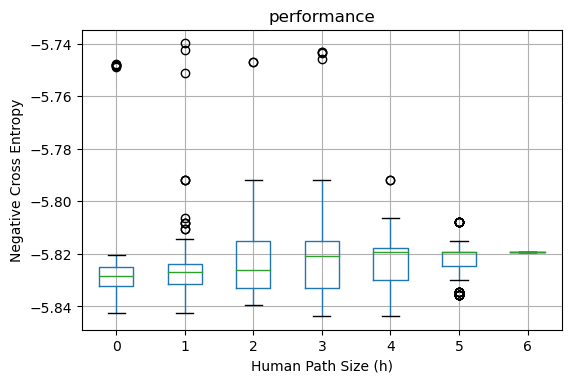

In [3]:
edits[edits.human_size + edits.machine_size == 6].boxplot("performance", by="human_size")

plt.suptitle("")
plt.xlabel("Human Path Size (h)")
plt.ylabel("Negative Cross Entropy")
plt.show()

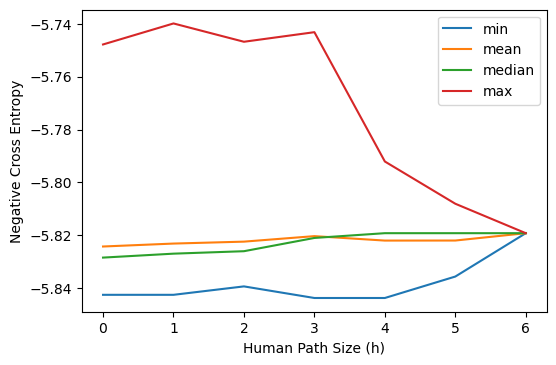

In [4]:
data = edits[edits.human_size + edits.machine_size == 6][["human_size", "performance"]]\
    .groupby("human_size").performance.agg(["min", "mean", "median", "max"]).reset_index()\
    .plot(x="human_size", y=["min", "mean", "median", "max"],
          xlabel="Human Path Size (h)", ylabel="Negative Cross Entropy")

plt.show()

In [5]:
test_results = []

for i in range(1, 7):
    for kind in ("min", "mean", "median", "max"):
        summary = edits[edits.human_size + edits.machine_size == i][["human_size", "performance"]]\
            .groupby("human_size").performance.agg(["min", "mean", "median", "max"]).reset_index()
        slope, _, _, pvalue, _ = stats.linregress(summary.human_size, summary[kind])
        
        test_results.append((i, kind, "slope", slope))
        test_results.append((i, kind, "pvalue", pvalue))
        
test_results = pd.DataFrame(test_results, columns=("total", "method", "kind", "value"))\
    .pivot(index="total", columns=["method", "kind"])
test_results.columns = pd.MultiIndex.from_tuples(i[1:] for i in test_results.columns)

test_results

min                mean              median                 max  \
          slope    pvalue     slope    pvalue     slope    pvalue     slope   
total                                                                         
1     -0.008056  0.000000 -0.010842  0.000000 -0.045417  0.000000 -0.028196   
2      0.003321  0.424274 -0.015041  0.184690 -0.034904  0.062967 -0.006155   
3     -0.000481  0.105573 -0.001264  0.729000  0.002253  0.213269 -0.004334   
4     -0.000361  0.057742 -0.001771  0.063513  0.002117  0.022530 -0.012083   
5      0.000884  0.288680 -0.000047  0.926316  0.002096  0.016635 -0.015102   
6      0.002834  0.083597  0.000636  0.025313  0.001785  0.001729 -0.014131   

                 
         pvalue  
total            
1      0.000000  
2      0.095288  
3      0.097569  
4      0.116519  
5      0.016069  
6      0.006702

## Human-Generated Paths (`human`)

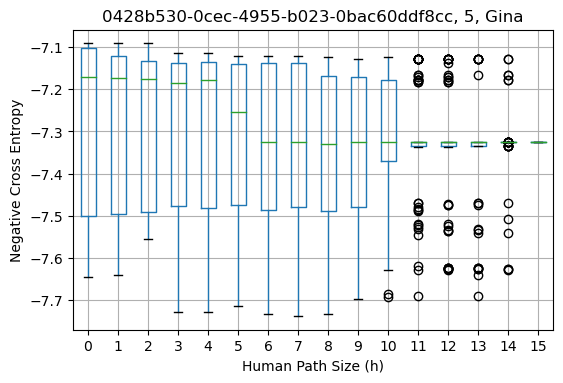

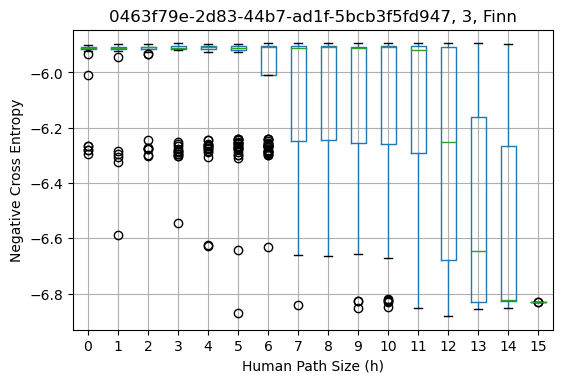

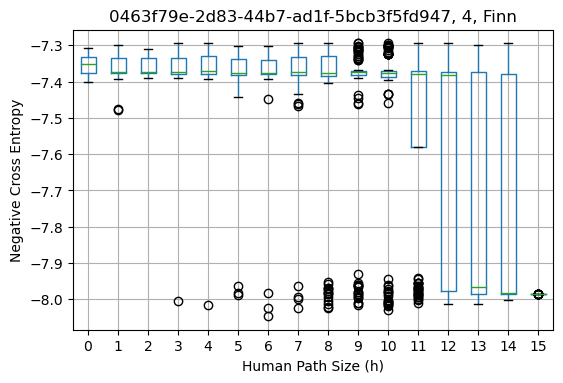

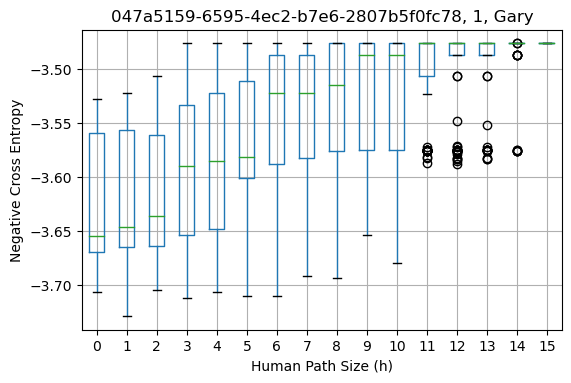

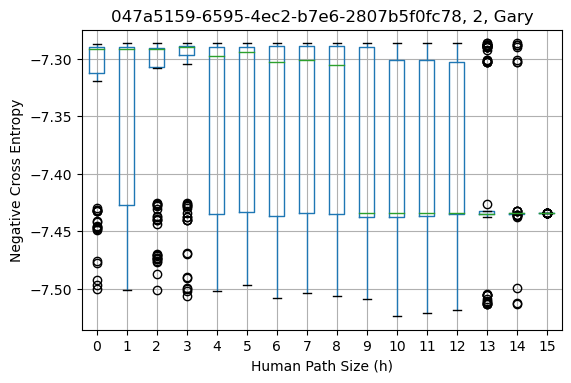

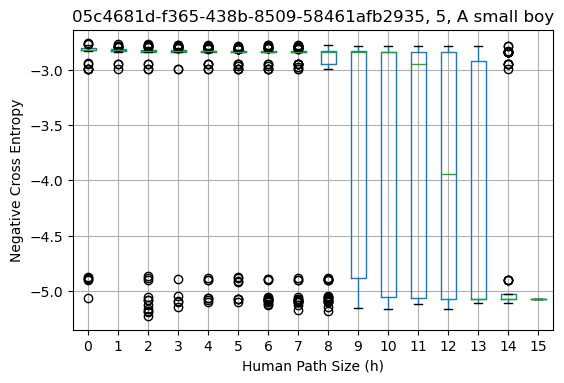

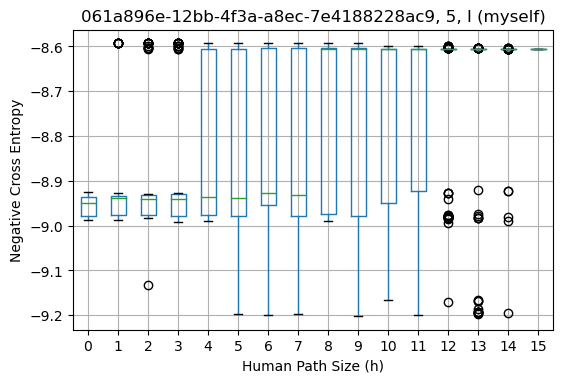

In [6]:
for (story, line, character), group in human.groupby(["story", "line", "character"]):
    group[group.human_size + group.machine_size == 15].boxplot("performance", by="human_size")
    
    plt.title(f"{story}, {line}, {character}")
    plt.suptitle("")
    plt.xlabel("Human Path Size (h)")
    plt.ylabel("Negative Cross Entropy")
    plt.show()

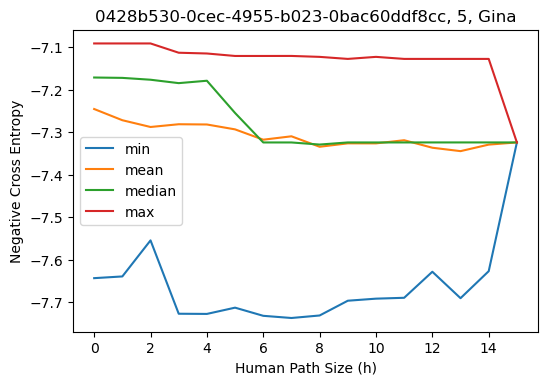

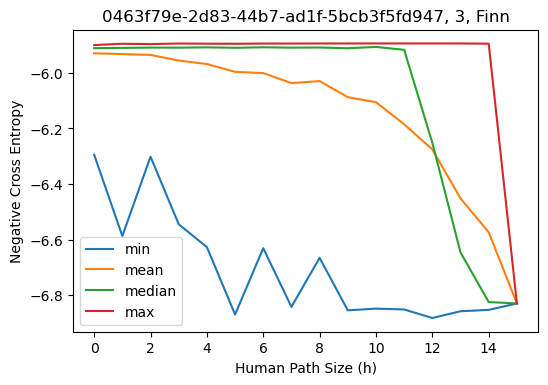

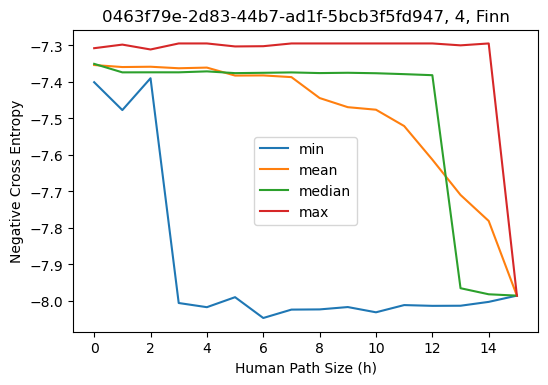

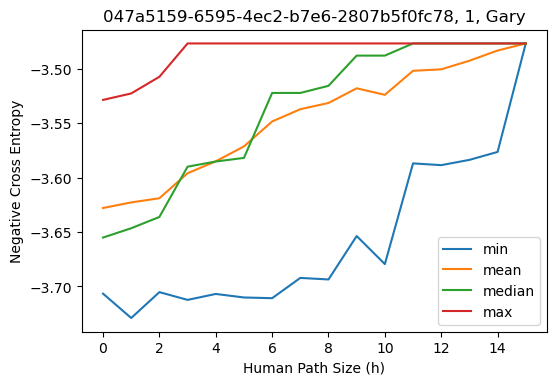

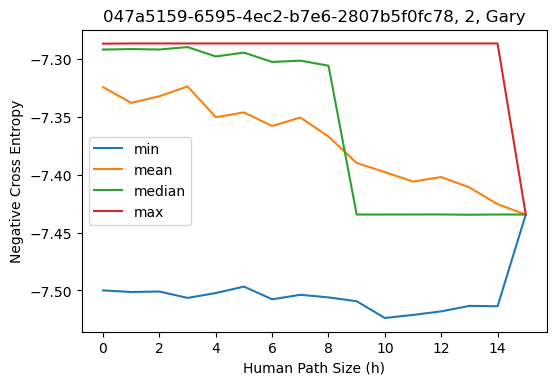

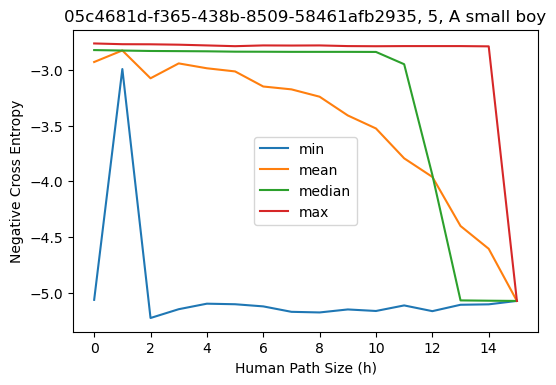

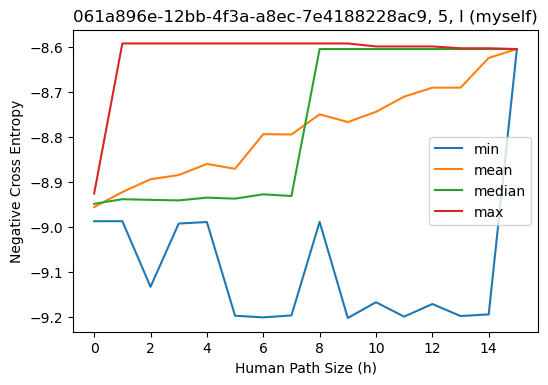

In [7]:
for (story, line, character), group in human.groupby(["story", "line", "character"]):
    group = group[group.human_size + group.machine_size == 15][["human_size", "performance"]]\
        .groupby("human_size").performance.agg(["min", "mean", "median", "max"]).reset_index()
    
    group.plot(x="human_size", y=["min", "mean", "median", "max"],
               title=f"{story}, {line}, {character}",
               xlabel="Human Path Size (h)", ylabel="Negative Cross Entropy")
    
    plt.show()

## COMET-Generated Paths (`comet`)

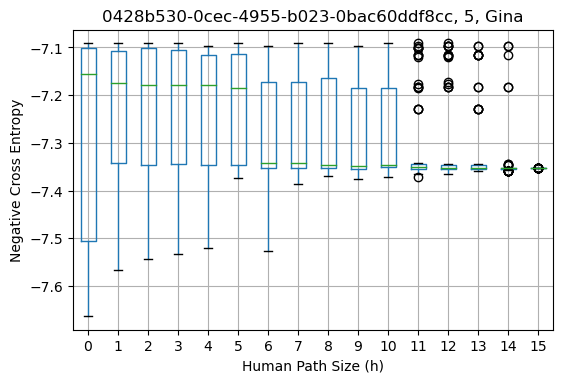

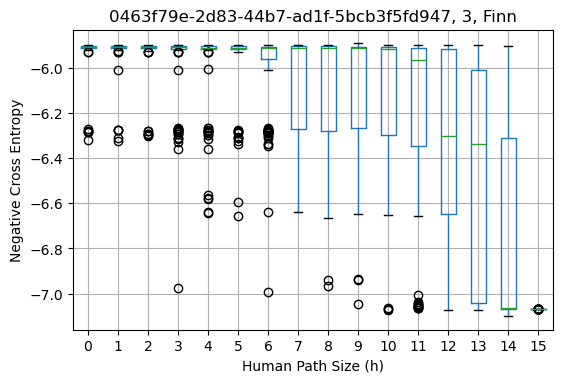

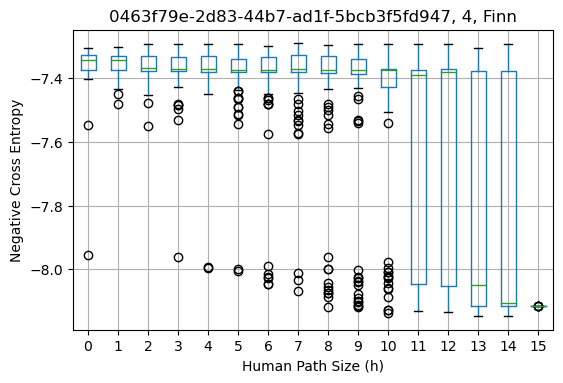

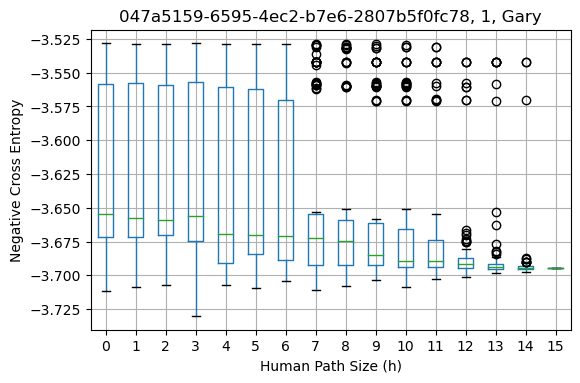

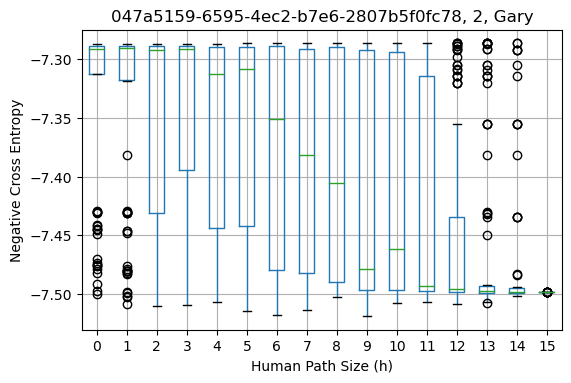

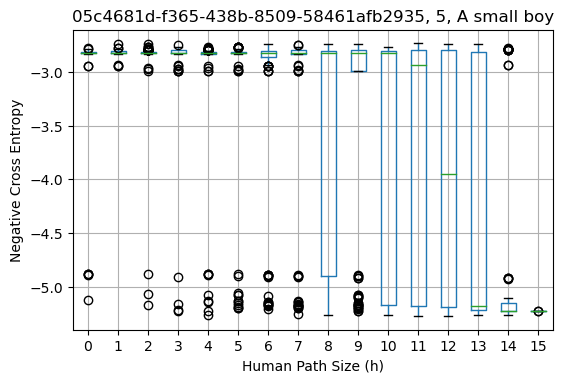

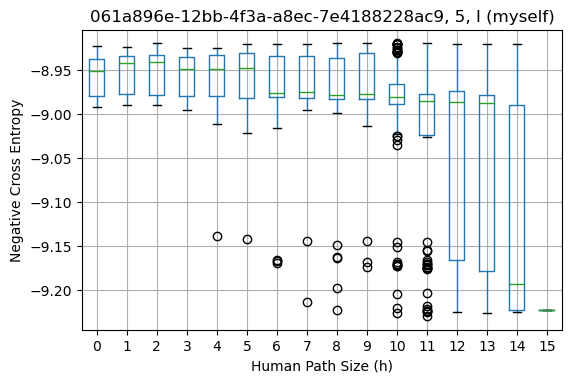

In [8]:
for (story, line, character), group in comet.groupby(["story", "line", "character"]):
    group[group.human_size + group.machine_size == 15].boxplot("performance", by="human_size")
    
    plt.title(f"{story}, {line}, {character}")
    plt.suptitle("")
    plt.xlabel("Human Path Size (h)")
    plt.ylabel("Negative Cross Entropy")
    plt.show()

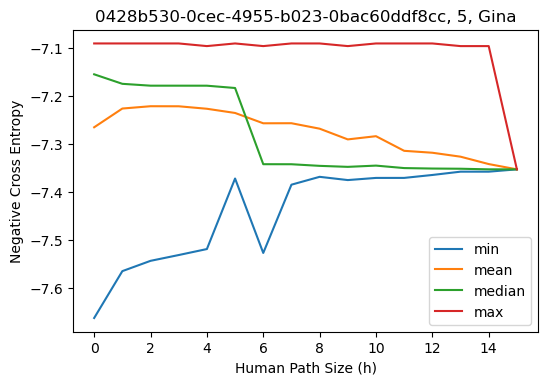

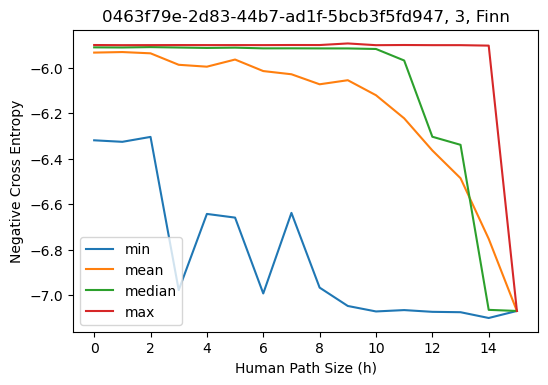

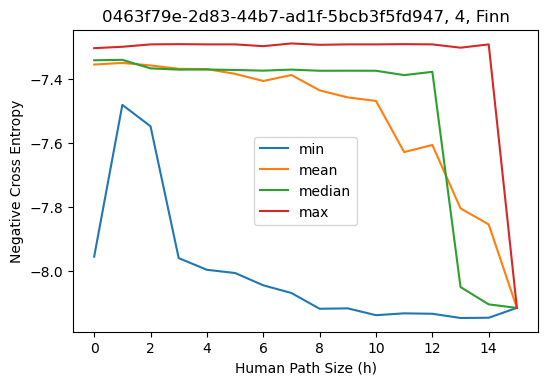

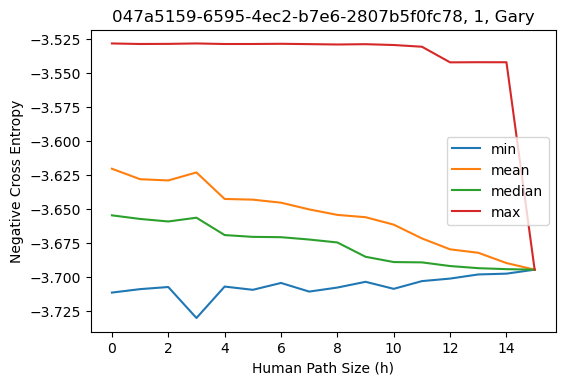

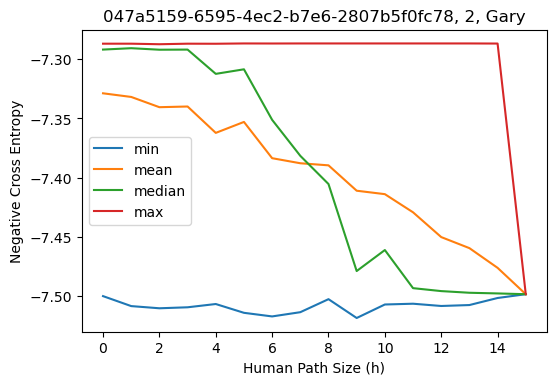

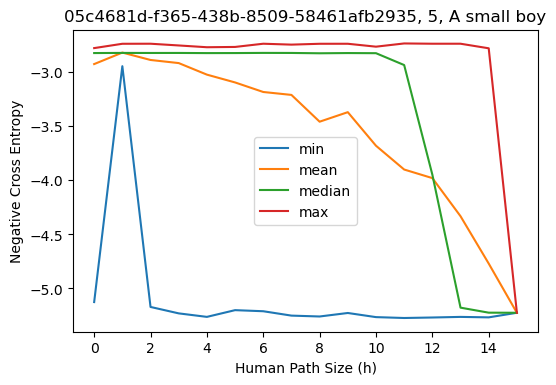

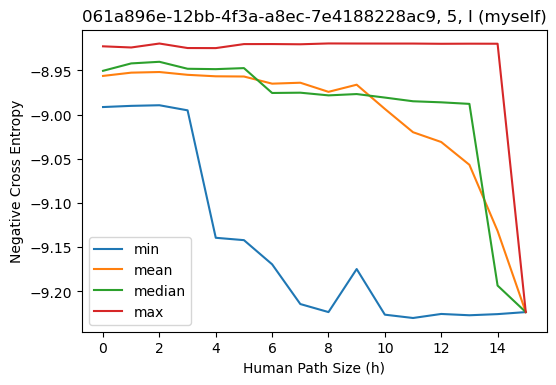

In [9]:
for (story, line, character), group in comet.groupby(["story", "line", "character"]):
    group = group[group.human_size + group.machine_size == 15][["human_size", "performance"]]\
        .groupby("human_size").performance.agg(["min", "mean", "median", "max"]).reset_index()
    
    group.plot(x="human_size", y=["min", "mean", "median", "max"],
               title=f"{story}, {line}, {character}",
               xlabel="Human Path Size (h)", ylabel="Negative Cross Entropy")
    
    plt.show()